In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns


### Import Training & Test data

In [2]:
%%time

df_train = pd.read_csv('../Home Credit/Dataset/application_train.csv')
df_test = pd.read_csv('../Home Credit/Dataset/application_test.csv')

Wall time: 2.66 s


### Columns of the Test Dataset

In [3]:
df_test.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)

### Columns of the training dataset

In [4]:
df_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [5]:
df_train.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Target column values

In [6]:
df_train['TARGET'].unique()

array([1, 0], dtype=int64)

### Shape of the dataset

In [7]:
print('Shape of train data',df_train.shape)

print('Shape of test data',df_test.shape)



Shape of train data (307511, 122)
Shape of test data (48744, 121)


### Datatype of Columns

In [8]:
print('\n Number of datatypes in the dataset are as below: \n')

df_train.dtypes.value_counts()


 Number of datatypes in the dataset are as below: 



float64    65
int64      41
object     16
dtype: int64

### Checking Unique Values for object type

In [9]:
print('Number of Unique Values for Object Data Type')

df_train.select_dtypes('object').nunique().sort_values(ascending=False)

Number of Unique Values for Object Data Type


ORGANIZATION_TYPE             58
OCCUPATION_TYPE               18
NAME_INCOME_TYPE               8
WALLSMATERIAL_MODE             7
WEEKDAY_APPR_PROCESS_START     7
NAME_TYPE_SUITE                7
NAME_HOUSING_TYPE              6
NAME_FAMILY_STATUS             6
NAME_EDUCATION_TYPE            5
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
CODE_GENDER                    3
EMERGENCYSTATE_MODE            2
FLAG_OWN_REALTY                2
FLAG_OWN_CAR                   2
NAME_CONTRACT_TYPE             2
dtype: int64

### Target Distribution using seaborn

 
 Target Distribution 



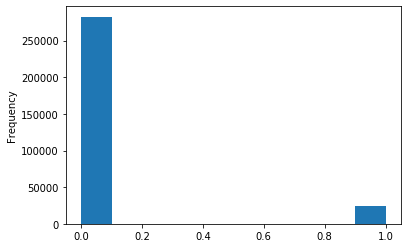

In [10]:
print(' \n Target Distribution \n')

df_train['TARGET'].value_counts()

df_train['TARGET'].astype(int).plot.hist()

### Missing Value Analysis

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [12]:
df_train.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [13]:
def missing_value(df):
    
    #Total missing value
    missing_sum = df.isnull().sum()
    
    
    #Percentage of missing value 
    miss_percent = 100 * df.isnull().sum()/len(df)
    
    #Missing Value table
    miss_val_table = pd.concat([missing_sum,miss_percent],axis=1)
    miss_val_table_ren_col = miss_val_table.rename(columns={0:'Missing Values',1:'Percentage of Missing Value'})
    miss_val_table_ren_col = miss_val_table_ren_col[miss_val_table_ren_col.iloc[:,1]!=0.0].sort_values('Percentage of Missing Value',ascending=False)
    
    print(' Number of columns with missing values:',miss_val_table_ren_col.shape[0])
    
    return miss_val_table_ren_col
    
    
missing_value(df_train)    

 Number of columns with missing values: 67


,Missing Values,Percentage of Missing Value
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_MODE,213514,69.432963
...,...,...
EXT_SOURCE_2,660,0.214626
AMT_GOODS_PRICE,278,0.090403
AMT_ANNUITY,12,0.003902
CNT_FAM_MEMBERS,2,0.000650


### Test data Analysis

In [14]:
print('Test dataset columns\n\n',df_test.columns)

df_test.shape



Test dataset columns

 Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)


(48744, 121)

### One Hot Encoding for Object Type 

In [15]:
df_train = pd.get_dummies(df_train,drop_first=True)
df_test = pd.get_dummies(df_test,drop_first=True)

print('Shape of train data after one hot encoding is ',df_train.shape)
print('Shape of test data after one hot encoding is',df_test.shape)

Shape of train data after one hot encoding is  (307511, 230)
Shape of test data after one hot encoding is (48744, 226)


### Alignment of columns based on Training and Test data 

In [16]:
#Target label
train_target = df_train['TARGET']


#Align column present in both the dataframe, i.e Train and Test

df_train,df_test = df_train.align(df_test,join='inner',axis=1)

df_train['TARGET']=train_target


print('Shape of train data after one hot encoding is ',df_train.shape)
print('Shape of test data after one hot encoding is',df_test.shape)

Shape of train data after one hot encoding is  (307511, 227)
Shape of test data after one hot encoding is (48744, 226)


### Anomalies Detection

In [17]:
df_train['CNT_CHILDREN'].describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [18]:
print('Describe method to check the statistics to get an idea for days employed \n')
print(df_train['DAYS_EMPLOYED'].describe())

print('\n Describe method to check the statistics to get an idea for days registration \n')

print(df_train['DAYS_REGISTRATION'].describe())



Describe method to check the statistics to get an idea for days employed 

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

 Describe method to check the statistics to get an idea for days registration 

count    307511.000000
mean      -4986.120328
std        3522.886321
min      -24672.000000
25%       -7479.500000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64


#### Observation: This looks like an anomaly since days employed and days registration cannot be in negative

### Checking if anomaly observation are default than others

In [19]:
anom = df_train[df_train['DAYS_EMPLOYED']==365243]
non_anom = df_train[df_train['DAYS_EMPLOYED']!=362543]

print('Length of anomalies data is',len(anom))
print('Default percentage with anomalies ',100*anom['TARGET'].mean())
print('Default percentage with nonanomalies ',100*non_anom['TARGET'].mean())

Length of anomalies data is 55374
Default percentage with anomalies  5.399646043269405
Default percentage with nonanomalies  8.072881945686495


### Create a Anomaly flag column

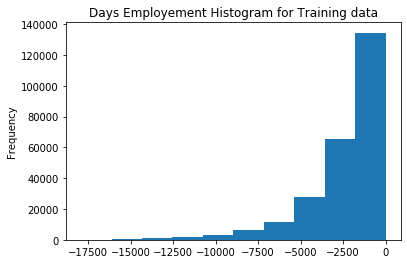

 There are 55374 anomalies in the 307511 entries in the training data


In [20]:
df_train['DAYS_EMPLOYED_ANOM'] = df_train['DAYS_EMPLOYED']==365243

df_train['DAYS_EMPLOYED'].replace({365243:np.nan},inplace=True)

df_train['DAYS_EMPLOYED'].plot.hist(title='Days Employement Histogram for Training data')

plt.show()

print(' There are %d anomalies in the %d entries in the training data' %(df_train['DAYS_EMPLOYED_ANOM'].sum(),len(df_train)))



### Test data for Anomaly detection

In [21]:
df_test['DAYS_EMPLOYED'].describe()

count     48744.000000
mean      67485.366322
std      144348.507136
min      -17463.000000
25%       -2910.000000
50%       -1293.000000
75%        -296.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

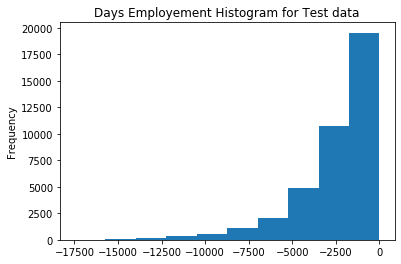

There are 9274 anomalies in the test data out of 48744 entries


In [22]:
df_test['DAYS_EMPLOYED_ANOM'] = df_test['DAYS_EMPLOYED']==365243

df_test['DAYS_EMPLOYED'].replace({365243:np.nan},inplace=True)

df_test['DAYS_EMPLOYED'].plot(kind='hist', title='Days Employement Histogram for Test data')
plt.show()

print('There are %d anomalies in the test data out of %d entries' % (df_test["DAYS_EMPLOYED_ANOM"].sum(), len(df_test)))

### Correlation 

In [23]:
correlation = df_train.corr()['TARGET'].sort_values()
print('Negative Correlation \n',correlation.head(15))
print('Positive Correlation \n ',correlation.tail(15))



Negative Correlation 
 EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
NAME_EDUCATION_TYPE_Higher education   -0.056593
NAME_INCOME_TYPE_Pensioner             -0.046209
ORGANIZATION_TYPE_XNA                  -0.045987
DAYS_EMPLOYED_ANOM                     -0.045987
FLOORSMAX_AVG                          -0.044003
FLOORSMAX_MEDI                         -0.043768
FLOORSMAX_MODE                         -0.043226
AMT_GOODS_PRICE                        -0.039645
REGION_POPULATION_RELATIVE             -0.037227
ELEVATORS_AVG                          -0.034199
ELEVATORS_MEDI                         -0.033863
FLOORSMIN_AVG                          -0.033614
Name: TARGET, dtype: float64
Positive Correlation 
  OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLA

#### Observation :
    
    So from the positive corelation of DAYS_BIRTH and TARGET, its clear that old age people pay in time
    

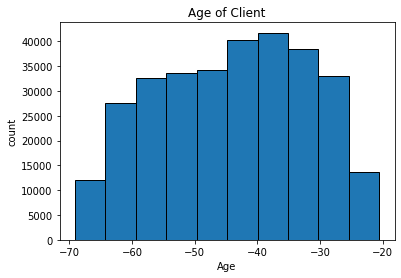

In [24]:
plt.hist(df_train['DAYS_BIRTH']/365,bins=10,edgecolor='k')
plt.title('Age of Client')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

### Kernel Density Estimation Plot:
    
    Kernel estimation density plot for Target and Age to understand the distribution of the data.

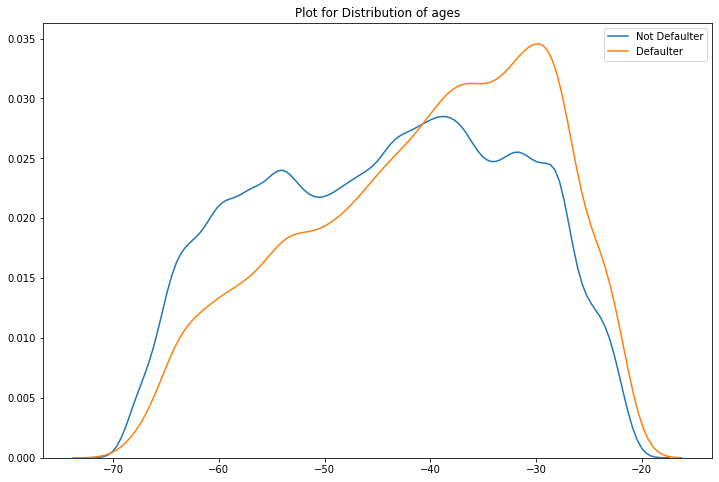

In [25]:
plt.figure(figsize=(12,8))
sns.kdeplot(df_train.loc[df_train['TARGET']==0,'DAYS_BIRTH']/365,label = 'Not Defaulter')
plt.title('Plot for Distribution of ages')

sns.kdeplot(df_train.loc[df_train['TARGET']==1,'DAYS_BIRTH']/365,label ='Defaulter' )
plt.show()

### Observation: 

        Data is skewed during early age and the end of the age 

### Bin Age data 

In [26]:
#Age information into a seperate dataframe


age_data = df_train.loc[:,['DAYS_BIRTH','TARGET']]
age_data['YEARS_AGE'] = age_data.loc[:,'DAYS_BIRTH']/-365
age_data['YEARS_BINNED'] = pd.cut(age_data.loc[:,'YEARS_AGE'],bins = np.linspace(20,70,num=11))

age_data.head()


,DAYS_BIRTH,TARGET,YEARS_AGE,YEARS_BINNED
0,-9461,1,25.920548,"(25.0, 30.0]"
1,-16765,0,45.931507,"(45.0, 50.0]"
2,-19046,0,52.180822,"(50.0, 55.0]"
3,-19005,0,52.068493,"(50.0, 55.0]"
4,-19932,0,54.608219,"(50.0, 55.0]"


### Data Visulaization of Age group for Defaulter

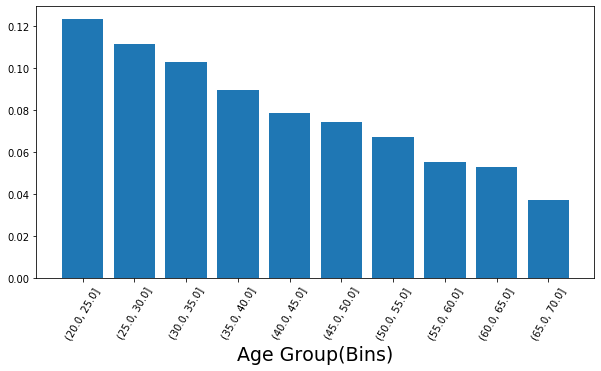

In [27]:
#Grouping Age data

plt.figure(figsize=(10,5))
age_group = age_data.groupby('YEARS_BINNED').mean()
plt.bar(age_group.index.astype(str),age_group['TARGET'])
plt.xticks(rotation=60)
plt.xlabel('Age Group(Bins)',fontsize=19)

plt.show()


#### Observation:
    
    There is a clear trend that people with young age are more deafulter and the trend decreases as the age increases.

#### External Sources:
    
    There are 3 external sources namely : EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1 which is negatively correlated with Target. Let's build a heatmap.

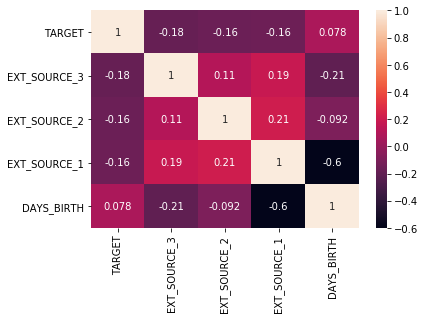

In [28]:
ext_col = df_train[['TARGET','EXT_SOURCE_3','EXT_SOURCE_2','EXT_SOURCE_1','DAYS_BIRTH']]

ext_corr = ext_col.corr()
sns.heatmap(ext_corr,annot=True)
plt.show()

EXT_SOURCE_1 is correlated with DAYS_BIRTH indicating that may be one of the factors related with each other.

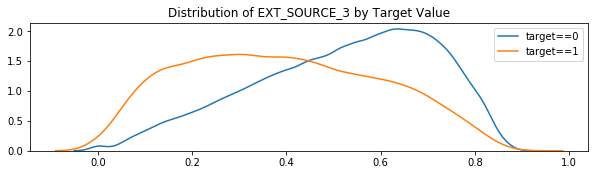

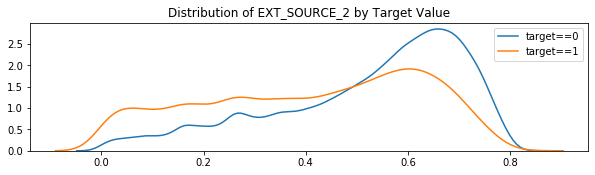

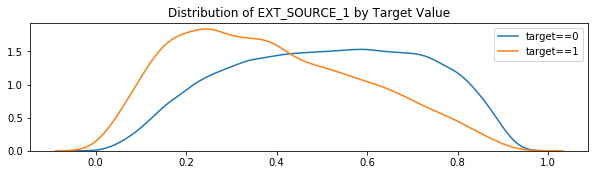

In [29]:
for i,source in enumerate(['EXT_SOURCE_3','EXT_SOURCE_2','EXT_SOURCE_1']):
    plt.figure(figsize=(10,8))
    plt.subplot(3, 1, i + 1)
    sns.kdeplot(df_train.loc[df_train['TARGET']==0,source],label='target==0')
    sns.kdeplot(df_train.loc[df_train['TARGET']==1,source],label='target==1')
    plt.title('Distribution of %s by Target Value' % source)
    

### Polynomial Features


One simple feature construction method is called polynomial features. In this method, we make features that are powers of existing features as well as interaction terms between existing features. For example, we can create variables EXT_SOURCE_1^2 and EXT_SOURCE_2^2 and also variables such as EXT_SOURCE_1 x EXT_SOURCE_2, EXT_SOURCE_1 x EXT_SOURCE_2^2, EXT_SOURCE_1^2 x EXT_SOURCE_2^2, and so on. These features that are a combination of multiple individual variables are called interaction terms because they capture the interactions between variables. In other words, while two variables by themselves may not have a strong influence on the target, combining them together into a single interaction variable might show a relationship with the target. Interaction terms are commonly used in statistical models to capture the effects of multiple variables, but I do not see them used as often in machine learning. Nonetheless, we can try out a few to see if they might help our model to predict whether or not a client will repay a loan.

Jake VanderPlas writes about polynomial features in his excellent book Python for Data Science for those who want more information.

In the following code, we create polynomial features using the EXT_SOURCE variables and the DAYS_BIRTH variable. Scikit-Learn has a useful class called PolynomialFeatures that creates the polynomials and the interaction terms up to a specified degree. We can use a degree of 3 to see the results (when we are creating polynomial features, we want to avoid using too high of a degree, both because the number of features scales exponentially with the degree, and because we can run into problems with overfitting)



In [33]:
poly_features = df_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = df_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

### Imputing for missing values

In [34]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

poly_target = poly_features['TARGET']
poly_features_train = poly_features.drop(columns=['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features_train)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)



# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)


Polynomial Features shape:  (307511, 35)


In [35]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:35]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2',
 'EXT_SOURCE_1^3',
 'EXT_SOURCE_1^2 EXT_SOURCE_2',
 'EXT_SOURCE_1^2 EXT_SOURCE_3',
 'EXT_SOURCE_1^2 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_2^2',
 'EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_3^2',
 'EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_1 DAYS_BIRTH^2',
 'EXT_SOURCE_2^3',
 'EXT_SOURCE_2^2 EXT_SOURCE_3',
 'EXT_SOURCE_2^2 DAYS_BIRTH',
 'EXT_SOURCE_2 EXT_SOURCE_3^2',
 'EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_2 DAYS_BIRTH^2',
 'EXT_SOURCE_3^3',
 'EXT_SOURCE_3^2 DAYS_BIRTH',
 'EXT_SOURCE_3 DAYS_BIRTH^2',
 'DAYS_BIRTH^3']

In [38]:
#Create a dataframe of the features


poly_features = pd.DataFrame(poly_features,columns=poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
EXT_SOURCE_3                             -0.155892
EXT_SOURCE_1 EXT_SOURCE_3^2              -0.150822
Name: TARGET, dtype: float64
EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH    0.155891
EXT_SOURCE_2 DAYS_BIRTH                 0.156873
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH    0.181283
TARGET                                  1.000000
1                                            NaN
Name: TARGET, dtype: float64


In [42]:
#Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = df_train['SK_ID_CURR']
app_train_poly = df_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = df_test['SK_ID_CURR']
app_test_poly = df_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)

Training data with polynomial features shape:  (307511, 262)
Testing data with polynomial features shape:   (48744, 262)


In [44]:
app_train_domain = df_train.copy()
app_test_domain = df_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']


### Visulaize new Variables

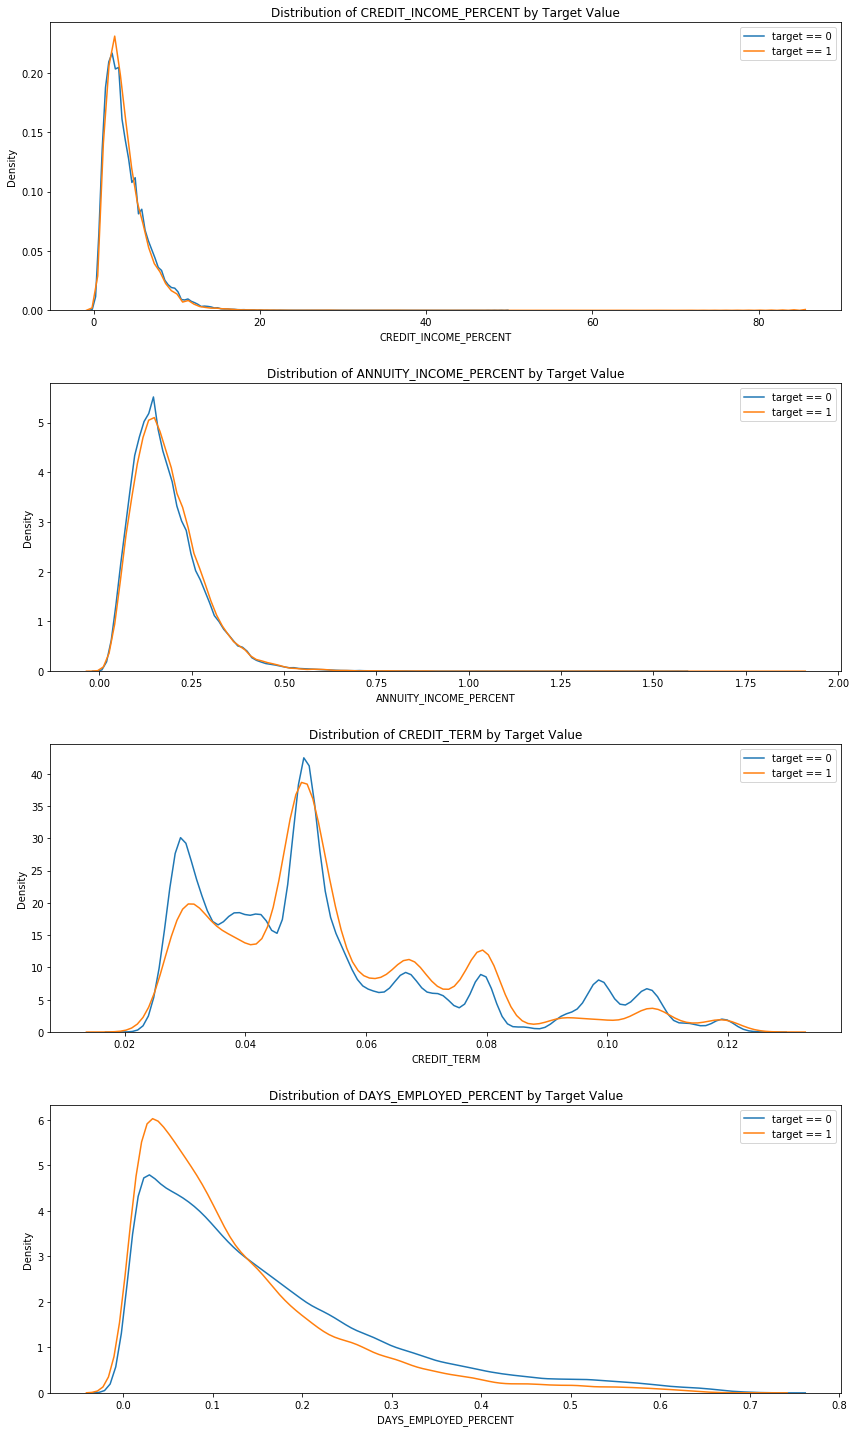

In [45]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

### Logistic Regression

In [49]:
from sklearn.preprocessing import MinMaxScaler

# Drop the target from the training data
if 'TARGET' in df_train:
    train = df_train.drop(columns = ['TARGET'])
else:
    train = df_train.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = df_test.copy()

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(df_test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (307511, 227)
Testing data shape:  (48744, 227)


In [51]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(train, train_target)

LogisticRegression(C=0.0001)

In [53]:
log_reg_pred = log_reg.predict_proba(test)[:, 1]
log_reg_pred

array([0.06925135, 0.10928645, 0.06382765, ..., 0.070815  , 0.0731017 ,
       0.08931333])

#### Conclusion:
    
    This is a startup kernel and we tried to understand the data, imputing missing values,detecting anomalies,feature Engineering etc.
    Once our feature engineering was completed we tried to create a baseline model using logistic regression which can be improved in future kernels. 
    
    
####References:

Url: https://www.theanalysisfactor.com/interpreting-interactions-in-regression/

Feature Enineering: https://jakevdp.github.io/PythonDataScienceHandbook/05.04-feature-engineering.html

Kernel : https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction

Polynomial features: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

Probblems with over and underfitting : https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py

